In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file from the local path
df = pd.read_csv("Financial_Management_Dataset.csv")

In [ ]:
# Convert and extract date components
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)

sns.set(style="whitegrid")

1. Monthly trends in spending and income across departments
  Month_Year  Department Transaction Type    Amount
0    2023-01          HR           Credit  11426.99
1    2023-01   Marketing           Credit   8217.30
2    2023-01   Marketing            Debit  18667.53
3    2023-01  Operations           Credit   7176.36
4    2023-01  Operations            Debit   6984.50


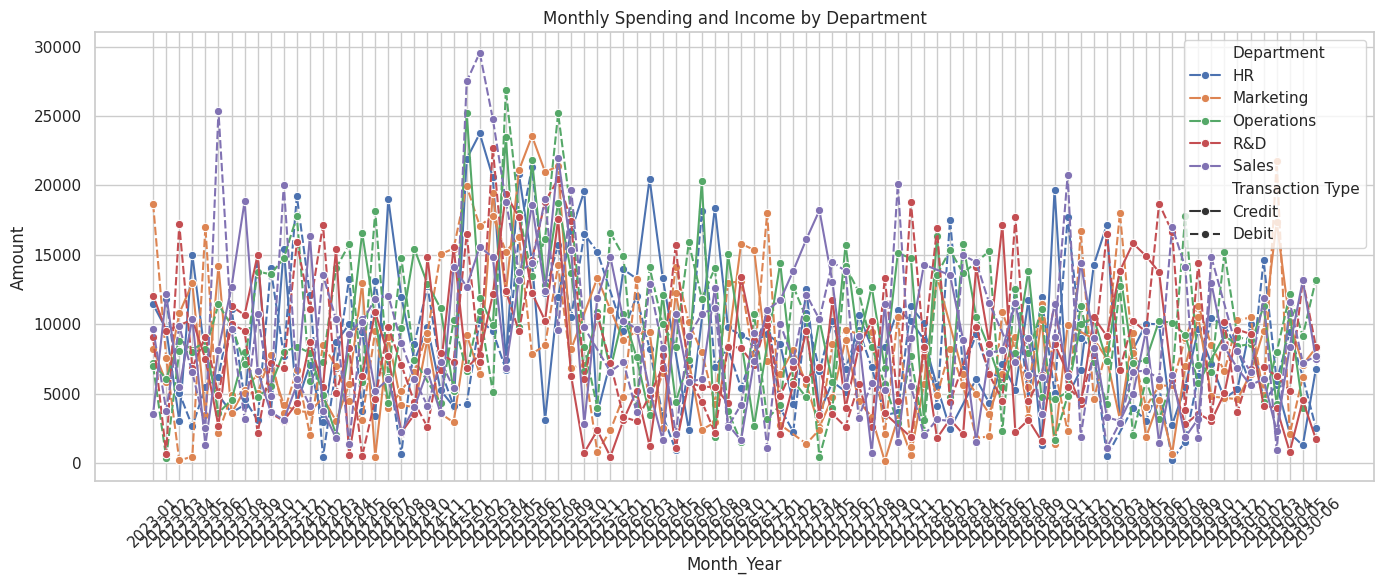

In [ ]:
# 1. Monthly trends in spending and income across departments
monthly_dept = df.groupby(['Month_Year', 'Department', 'Transaction Type'])['Amount'].sum().reset_index()
print("1. Monthly trends in spending and income across departments")
print(monthly_dept.head())
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_dept, x='Month_Year', y='Amount', hue='Department', style='Transaction Type', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Spending and Income by Department')
plt.tight_layout()
plt.show()

# New Section

In [ ]:
# 2. Departments overshooting budgets by category
category_dept = df.groupby(['Department', 'Category'])['Amount'].sum().reset_index()
print("\n2. Department-wise spending by Category (to spot budget overshoots)")
print(category_dept.sort_values(by='Amount', ascending=False).head(10))


2. Department-wise spending by Category (to spot budget overshoots)
    Department     Category     Amount
15  Operations       Salary  344404.13
6    Marketing   Investment  331366.90
24       Sales   Investment  305233.23
28       Sales       Travel  303939.50
13  Operations  Maintenance  297056.29
1           HR  Maintenance  289630.73
12  Operations   Investment  285756.63
18         R&D   Investment  279074.85
23         R&D    Utilities  274267.81
16  Operations       Travel  273852.08


In [ ]:
# 3. Average monthly expenditure per account
monthly_account = df[df['Transaction Type'] == 'Debit'].groupby(['Month_Year', 'Account Name'])['Amount'].mean().reset_index()
print("\n3. Average monthly debit per account")
print(monthly_account.head())


3. Average monthly debit per account
  Month_Year        Account Name       Amount
0    2023-01  Investment Account  3060.330000
1    2023-01   Operating Account  2659.898000
2    2023-01     Payroll Account  3943.787500
3    2023-02  Investment Account  3013.933333
4    2023-02   Operating Account  2294.640000



4. Net Cash Flow per Month
Transaction Type    Credit     Debit  Net Cash Flow
Month_Year                                         
2023-01           42443.12  44376.29       -1933.17
2023-02           43185.87  24175.21       19010.66
2023-03           28074.23  40378.44      -12304.21
2023-04           56849.79  24491.66       32358.13
2023-05           28636.49  42393.07      -13756.58


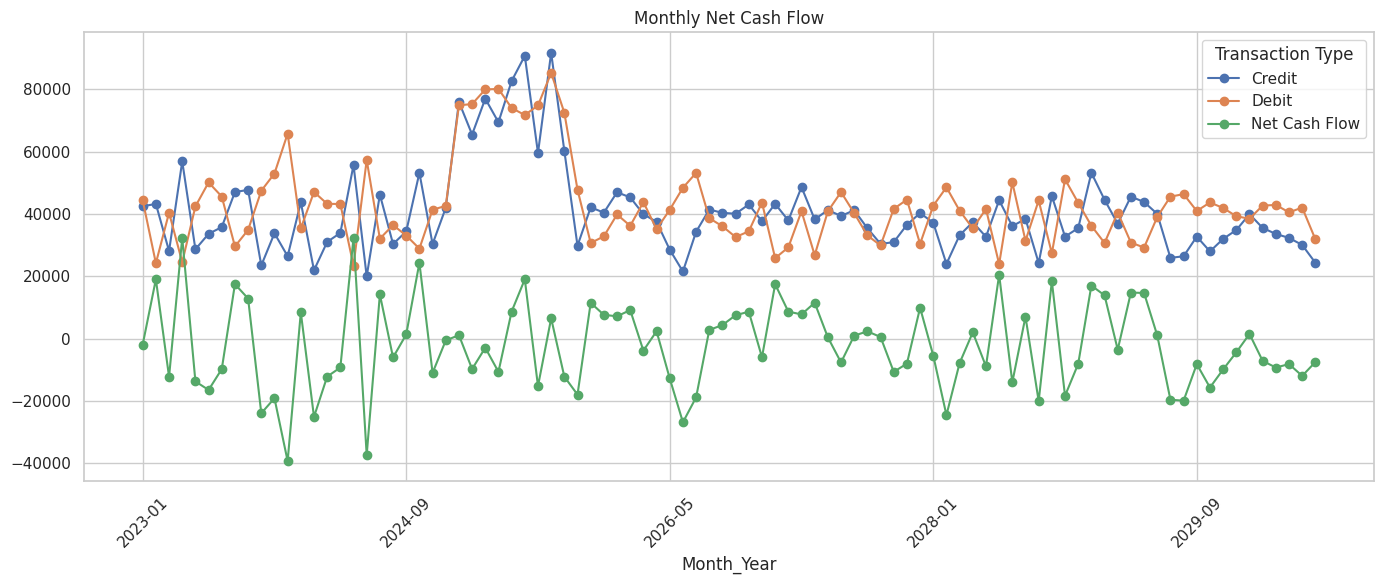

In [ ]:
# 4. Net cash flow per month
cash_flow = df.pivot_table(index='Month_Year', columns='Transaction Type', values='Amount', aggfunc='sum').fillna(0)
cash_flow['Net Cash Flow'] = cash_flow['Credit'] - cash_flow['Debit']
print("\n4. Net Cash Flow per Month")
print(cash_flow.head())
cash_flow[['Credit', 'Debit', 'Net Cash Flow']].plot(kind='line', figsize=(14, 6), marker='o')
plt.title('Monthly Net Cash Flow')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 5. Top categories for inflow and outflow
top_categories = df.groupby(['Category', 'Transaction Type'])['Amount'].sum().reset_index()
print("\n5. Top inflow and outflow categories")
print(top_categories.sort_values(by='Amount', ascending=False).head(10))


5. Top inflow and outflow categories
       Category Transaction Type     Amount
0    Investment           Credit  820205.25
7        Salary            Debit  690480.58
5      Purchase            Debit  667452.11
8        Travel           Credit  654201.68
1    Investment            Debit  652404.88
9        Travel            Debit  624510.34
2   Maintenance           Credit  619778.76
11    Utilities            Debit  614531.67
3   Maintenance            Debit  611589.72
10    Utilities           Credit  574489.49


In [ ]:
# 6. Large transactions detection
high_transactions = df[df['Amount'] > df['Amount'].mean() + 2 * df['Amount'].std()]
print("\n6. Transactions significantly above average (possible liquidity risk)")
print(high_transactions[['Transaction ID', 'Date', 'Amount', 'Department', 'Category']].head())


6. Transactions significantly above average (possible liquidity risk)
     Transaction ID       Date   Amount Department   Category
1016      TXN200016 2025-01-17  5403.55         HR  Utilities
1067      TXN200067 2025-03-09  5695.96      Sales   Purchase
1156      TXN200156 2025-06-06  5389.04  Marketing  Utilities
1180      TXN200180 2025-06-30  5652.71         HR   Purchase
1210      TXN200210 2025-07-30  5441.35        R&D  Utilities



7. Spending trend per category
  Month_Year     Category    Amount
0    2023-01  Maintenance   1864.25
1    2023-01     Purchase  12514.82
2    2023-01       Salary  12353.58
3    2023-01       Travel  12802.16
4    2023-01    Utilities   4841.48


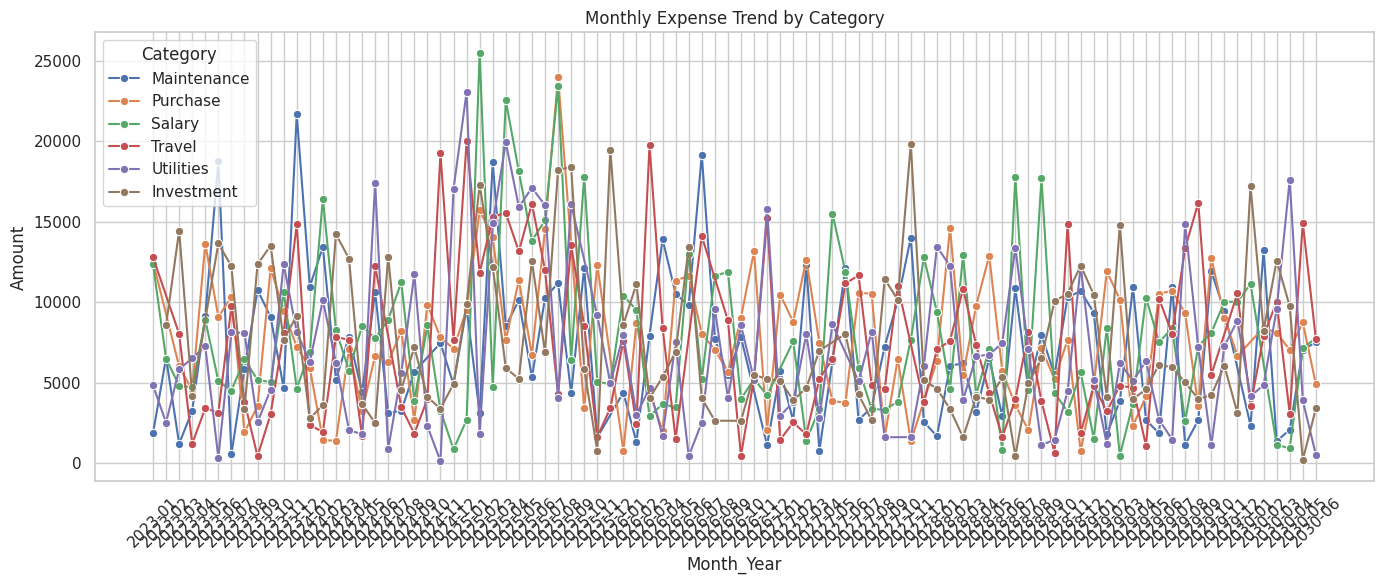

In [ ]:
# 7. Spending trend per category
category_trend = df[df['Transaction Type'] == 'Debit'].groupby(['Month_Year', 'Category'])['Amount'].sum().reset_index()
print("\n7. Spending trend per category")
print(category_trend.head())
plt.figure(figsize=(14, 6))
sns.lineplot(data=category_trend, x='Month_Year', y='Amount', hue='Category', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Expense Trend by Category')
plt.tight_layout()
plt.show()

In [ ]:
# 8. Top approvers by volume and value
approver_stats = df.groupby('Approved By')['Amount'].agg(['count', 'sum']).reset_index().rename(columns={'count': 'Transaction Count', 'sum': 'Total Amount'})
print("\n8. Top approvers by transaction count and value")
print(approver_stats.sort_values(by='Total Amount', ascending=False))


8. Top approvers by transaction count and value
  Approved By  Transaction Count  Total Amount
2   Manager B                778    2017692.45
3   Manager C                809    1926754.25
0         CFO                678    1787582.98
1   Manager A                735    1782514.65


In [ ]:
# 9. Non-operational spend analysis
non_operational = df[df['Category'].isin(['Travel', 'Maintenance', 'Ad-hoc Expense'])]
non_op_summary = non_operational.groupby('Category')['Amount'].sum().reset_index()
print("\n9. Spend in Non-operational categories")
print(non_op_summary)


9. Spend in Non-operational categories
      Category      Amount
0  Maintenance  1231368.48
1       Travel  1278712.02


In [ ]:
# 10. Unusual department patterns
transaction_count = df.groupby(['Department', 'Transaction Type'])['Amount'].agg(['count', 'mean', 'sum']).reset_index()
print("\n10. Unusual department patterns")
print(transaction_count.sort_values(by='sum', ascending=False).head(10))


10. Unusual department patterns
   Department Transaction Type  count         mean        sum
5  Operations            Debit    342  2513.443713  859597.75
9       Sales            Debit    309  2673.021553  825963.66
4  Operations           Credit    299  2680.617759  801504.71
0          HR           Credit    309  2548.809676  787582.19
7         R&D            Debit    323  2397.058731  774249.97
8       Sales           Credit    313  2415.489808  756048.31
1          HR            Debit    281  2498.648648  702120.27
3   Marketing            Debit    280  2496.563036  699037.65
2   Marketing           Credit    278  2375.158165  660293.97
6         R&D           Credit    266  2436.638534  648145.85


In [ ]:
# 11. Outliers in transaction amounts
outliers = df[df['Amount'] > df['Amount'].mean() + 2 * df['Amount'].std()]
print("\n11. Outlier Transactions (Above 2 Std Dev)")
print(outliers[['Transaction ID', 'Date', 'Amount', 'Department', 'Category']].head())


11. Outlier Transactions (Above 2 Std Dev)
     Transaction ID       Date   Amount Department   Category
1016      TXN200016 2025-01-17  5403.55         HR  Utilities
1067      TXN200067 2025-03-09  5695.96      Sales   Purchase
1156      TXN200156 2025-06-06  5389.04  Marketing  Utilities
1180      TXN200180 2025-06-30  5652.71         HR   Purchase
1210      TXN200210 2025-07-30  5441.35        R&D  Utilities


In [ ]:
# 12. Forecasting next month's spend (simple last-month extrapolation)
last_month = df[df['Date'].dt.month == df['Date'].max().month]
forecast = last_month.groupby('Category')['Amount'].mean().reset_index()
forecast.columns = ['Category', 'Forecast_Next_Month']
print("\n12. Forecast of Next Month’s Spending by Category")
print(forecast)


12. Forecast of Next Month’s Spending by Category
      Category  Forecast_Next_Month
0   Investment          2876.176000
1  Maintenance          3015.193000
2     Purchase          2425.673902
3       Salary          2747.605800
4       Travel          2273.397857
5    Utilities          2053.088571



13. Monthly trend of Credit vs Debit
  Month_Year Transaction Type    Amount
0    2023-01           Credit  42443.12
1    2023-01            Debit  44376.29
2    2023-02           Credit  43185.87
3    2023-02            Debit  24175.21
4    2023-03           Credit  28074.23


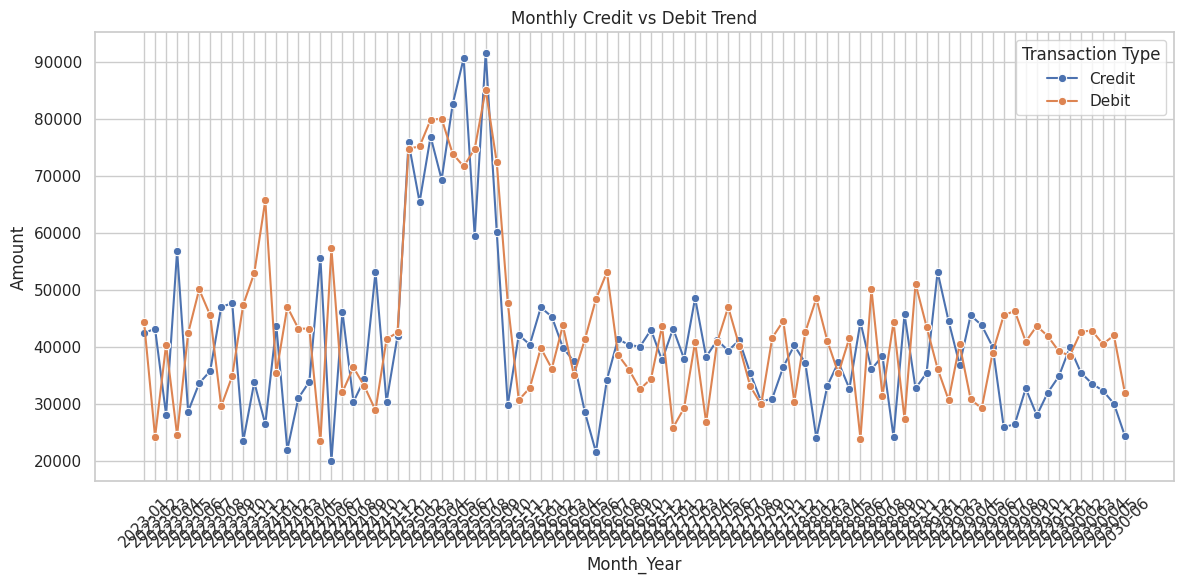

In [ ]:
# 13. Transaction type trend over time
ttype_trend = df.groupby(['Month_Year', 'Transaction Type'])['Amount'].sum().reset_index()
print("\n13. Monthly trend of Credit vs Debit")
print(ttype_trend.head())
plt.figure(figsize=(12, 6))
sns.lineplot(data=ttype_trend, x='Month_Year', y='Amount', hue='Transaction Type', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Credit vs Debit Trend')
plt.tight_layout()
plt.show()

In [ ]:
# 14. Approver patterns in high-value transactions
high_value_approvals = df[df['Amount'] > 4000].groupby('Approved By')['Amount'].count().reset_index().sort_values(by='Amount', ascending=False)
print("\n14. High-value transaction approvals by person")
print(high_value_approvals)


14. High-value transaction approvals by person
  Approved By  Amount
2   Manager B     157
0         CFO     143
3   Manager C     136
1   Manager A     117


In [ ]:
# 15. Distribution of transaction type by category
ttype_dist = df.groupby(['Category', 'Transaction Type'])['Amount'].sum().unstack().fillna(0)
print("\n15. Transaction Type Distribution by Category")
print(ttype_dist)


15. Transaction Type Distribution by Category
Transaction Type     Credit      Debit
Category                              
Investment        820205.25  652404.88
Maintenance       619778.76  611589.72
Purchase          455252.72  667452.11
Salary            529647.13  690480.58
Travel            654201.68  624510.34
Utilities         574489.49  614531.67
